# Cálculo do acréscimo de área construída
### **autor**: Henrique Pougy

Neste notebook, iremos calcular o acréscimo de área construída na cidade de São Paulo nos últimos 10 anos (2013 a 2022).

Este período se inicia em 2013, com os estudos que embasaram a elaboração do Plano Diretor Estratégico do Município (o PL 668/13, versão inicial do PDE, foi encaminhado à câmara em Julho de 2013). E se finaliza em 2023, ano de finalização da Revisão Intermediária do PDE (e ano atual de elaboração deste estudo). Note que a base do IPTU é atualizada anualmente, sempre no início do ano, quando são emitidos os carnês de cobrança. Assim, nosso dados estão atualizados até janeiro de 2022.

O acréscimo de área construída será calculado a partir da verificação, a cada ano contido no período, do aumento de área construída por quadra do município. Esse aumento será obtido a partir da análise do banco de dados do Imposto Territorial e Predial Urbano (IPTU), tornados públicos pela Secretaria da Fazenda do município.

Como o foco de nosso estudo está na verticalização da cidade, calcularemos apenas o acréscimo de área construída cuja tipologia seja **Vertical**. Desse modo, diminuímos o risco de modelar o aumento de área construída pela construção de edículas, "puxadinhos" ou mesmo pela melhoria da base de cálculo do IPTU por parte do emprego de tecnologias de fiscalização (LIDAR).

A área construída vertical é mais "segura" de ser analisada pois, sempre que é emitido um habite-se, os novos lotes do empreendimento imobiliário são criados na base do IPTU e, com eles, a nova área construída é adicionada.


Primeiro, vamos rodar o script para baixar todos os dados do estudo. Ele precisa ser rodado apenas uma vez - neste primeiro notebook.

In [1]:
from core.extract import download_all_data

In [2]:
download_all_data()

Shape /home/h-pgy/Desktop/Projetos/alain_bertaud/original_data/shp_files/distritos já salvo
Shape /home/h-pgy/Desktop/Projetos/alain_bertaud/original_data/shp_files/setores_censitarios já salvo
Shape /home/h-pgy/Desktop/Projetos/alain_bertaud/original_data/shp_files/estacoes_metro já salvo
Shape /home/h-pgy/Desktop/Projetos/alain_bertaud/original_data/shp_files/zonas_OD_2017 já salvo
Shape /home/h-pgy/Desktop/Projetos/alain_bertaud/original_data/shp_files/quadras_fiscais já salvo
Shape /home/h-pgy/Desktop/Projetos/alain_bertaud/original_data/shp_files/eixos_transformacao_urbana já salvo
Shape /home/h-pgy/Desktop/Projetos/alain_bertaud/original_data/shp_files/zoneamento já salvo
Arquivo 2013.csv ja salvo.
Arquivo 2023.csv ja salvo.
Dados censo já salvos
Dados pesquisa OD já salvos


In [3]:
import pandas as pd
import seaborn as sns
import os
from core.utils.file_path import solve_path, list_files
from core.config import ORIGINAL_DATA_FOLDER, GENERATED_DATA_FOLDER


In [4]:
pd.set_option('display.max_columns', None)
sns.set()

In [5]:
csvs_path = solve_path('iptu_data', ORIGINAL_DATA_FOLDER)
csv_files = list_files(csvs_path, '.csv')
for f in csv_files:
    print(f)

/home/h-pgy/Desktop/Projetos/alain_bertaud/original_data/iptu_data/IPTU_2023.csv
/home/h-pgy/Desktop/Projetos/alain_bertaud/original_data/iptu_data/EG_2013.csv


In [6]:
def read_csv_year(year, files=csv_files):
    
    year = str(year)
    year_file = [f for f in files if f.endswith(f'{year}.csv')][0]
    
    try:
        return pd.read_csv(year_file, encoding='utf-8', sep=';', quotechar='"', dtype=str)
    except UnicodeDecodeError:
        return pd.read_csv(year_file, encoding='latin-1', sep=';', quotechar='"', dtype=str)



In [7]:
df_2013 = read_csv_year(2013)

In [8]:
df_2013.head()

,NUMERO DO CONTRIBUINTE,ANO DO EXERCICIO,NUMERO DA NL,DATA DO CADASTRAMENTO,NUMERO DO CONDOMINIO,CODLOG DO IMOVEL,NOME DE LOGRADOURO DO IMOVEL,NUMERO DO IMOVEL,COMPLEMENTO DO IMOVEL,BAIRRO DO IMOVEL,REFERENCIA DO IMOVEL,CEP DO IMOVEL,QUANTIDADE DE ESQUINAS FRENTES,FRACAO IDEAL,AREA DO TERRENO,AREA CONSTRUIDA,AREA OCUPADA,VALOR DO M2 DO TERRENO,VALOR DO M2 DE CONSTRUCAO,ANO DA CONSTRUCAO CORRIGIDO,QUANTIDADE DE PAVIMENTOS,TESTADA PARA CALCULO,TIPO DE USO DO IMOVEL,TIPO DE PADRAO DA CONSTRUCAO,TIPO DE TERRENO,FATOR DE OBSOLESCENCIA,ANO DE INICIO DA VIDA DO CONTRIBUINTE,MES DE INICIO DA VIDA DO CONTRIBUINTE,FASE DO CONTRIBUINTE
0,0010030001-4,2013,1,NaN,00-0,03812-1,R S CAETANO,13,NaN,SANTA EFIGENIA,NaN,01104-001,1,"1,0000",136,135,108,"906,00","733,00",1924,1,"13,00",loja,comercial horizontal - Padrão B,de esquina,"0,20",1963,1,NaN
1,0010030002-2,2013,1,NaN,00-0,03812-1,R S CAETANO,19,NaN,SANTA EFIGENIA,NaN,01104-001,0,"1,0000",90,67,67,"906,00","733,00",1944,1,"6,00",loja,comercial horizontal - Padrão B,normal,"0,20",1963,1,NaN
2,0010030003-0,2013,1,NaN,00-0,03812-1,R S CAETANO,27,NaN,SANTA EFIGENIA,NaN,01104-001,0,"1,0000",105,140,84,"906,00","733,00",1965,2,"7,85",loja,comercial horizontal - Padrão B,normal,"0,42",1963,1,NaN
3,0010030004-9,2013,1,NaN,00-0,03812-1,R S CAETANO,33,NaN,NaN,NaN,01104-001,0,"1,0000",108,103,86,"906,00","733,00",1944,1,"6,05",loja,comercial horizontal - Padrão B,normal,"0,20",1963,1,NaN
4,0010030005-7,2013,1,NaN,00-0,03812-1,R S CAETANO,39,NaN,NaN,NaN,01104-001,0,"1,0000",120,98,96,"906,00","733,00",1944,1,"6,70",loja,comercial horizontal - Padrão B,normal,"0,20",1963,1,NaN


In [9]:
#nao contem dados para data do cadastramento, mas é do início de 2013
#a base é atualizada anualmente, sempre no início do ano
df_2013['DATA DO CADASTRAMENTO'].unique()



array([nan], dtype=object)

In [10]:
df_2013.dtypes

NUMERO DO CONTRIBUINTE                   object
ANO DO EXERCICIO                         object
NUMERO DA NL                             object
DATA DO CADASTRAMENTO                    object
NUMERO DO CONDOMINIO                     object
CODLOG DO IMOVEL                         object
NOME DE LOGRADOURO DO IMOVEL             object
NUMERO DO IMOVEL                         object
COMPLEMENTO DO IMOVEL                    object
BAIRRO DO IMOVEL                         object
REFERENCIA DO IMOVEL                     object
CEP DO IMOVEL                            object
QUANTIDADE DE ESQUINAS FRENTES           object
FRACAO IDEAL                             object
AREA DO TERRENO                          object
AREA CONSTRUIDA                          object
AREA OCUPADA                             object
VALOR DO M2 DO TERRENO                   object
VALOR DO M2 DE CONSTRUCAO                object
ANO DA CONSTRUCAO CORRIGIDO              object
QUANTIDADE DE PAVIMENTOS                

In [11]:
df_2023 = read_csv_year(2023)

In [12]:
df_2023['DATA DO CADASTRAMENTO'].unique()

array(['01/01/23'], dtype=object)

In [13]:
df_2023.head()

,NUMERO DO CONTRIBUINTE,ANO DO EXERCICIO,NUMERO DA NL,DATA DO CADASTRAMENTO,NUMERO DO CONDOMINIO,CODLOG DO IMOVEL,NOME DE LOGRADOURO DO IMOVEL,NUMERO DO IMOVEL,COMPLEMENTO DO IMOVEL,BAIRRO DO IMOVEL,REFERENCIA DO IMOVEL,CEP DO IMOVEL,QUANTIDADE DE ESQUINAS FRENTES,FRACAO IDEAL,AREA DO TERRENO,AREA CONSTRUIDA,AREA OCUPADA,VALOR DO M2 DO TERRENO,VALOR DO M2 DE CONSTRUCAO,ANO DA CONSTRUCAO CORRIGIDO,QUANTIDADE DE PAVIMENTOS,TESTADA PARA CALCULO,TIPO DE USO DO IMOVEL,TIPO DE PADRAO DA CONSTRUCAO,TIPO DE TERRENO,FATOR DE OBSOLESCENCIA,ANO DE INICIO DA VIDA DO CONTRIBUINTE,MES DE INICIO DA VIDA DO CONTRIBUINTE,FASE DO CONTRIBUINTE
0,0010030001-4,2023,1,01/01/23,00-0,03812-1,R S CAETANO,13,NaN,SANTA EFIGENIA,NaN,01104-001,1,"1,0000",136,135,108,"3523,00","2600,00",1924,1,"13,00",Loja,Comercial horizontal - padrão B,De esquina,"0,20",1963,1,0
1,0010030002-2,2023,1,01/01/23,00-0,03812-1,R S CAETANO,19,NaN,SANTA EFIGENIA,NaN,01104-001,0,"1,0000",90,67,67,"3523,00","2600,00",1944,1,"6,00",Loja,Comercial horizontal - padrão B,Normal,"0,20",1963,1,0
2,0010030003-0,2023,1,01/01/23,00-0,03812-1,R S CAETANO,27,NaN,SANTA EFIGENIA,NaN,01104-001,0,"1,0000",105,140,84,"3523,00","2600,00",1965,2,"7,85",Loja,Comercial horizontal - padrão B,Normal,"0,24",1963,1,0
3,0010030004-9,2023,1,01/01/23,00-0,03812-1,R S CAETANO,33,NaN,NaN,NaN,01104-001,0,"1,0000",108,103,86,"3523,00","2600,00",1944,1,"6,05",Loja,Comercial horizontal - padrão B,Normal,"0,20",1963,1,0
4,0010030005-7,2023,1,01/01/23,00-0,03812-1,R S CAETANO,39,NaN,NaN,NaN,01104-001,0,"1,0000",120,170,110,"3523,00","2600,00",2004,2,"6,70",Loja,Comercial horizontal - padrão B,Normal,"0,83",1963,1,0


In [14]:
df_2023.dtypes

NUMERO DO CONTRIBUINTE                   object
ANO DO EXERCICIO                         object
NUMERO DA NL                             object
DATA DO CADASTRAMENTO                    object
NUMERO DO CONDOMINIO                     object
CODLOG DO IMOVEL                         object
NOME DE LOGRADOURO DO IMOVEL             object
NUMERO DO IMOVEL                         object
COMPLEMENTO DO IMOVEL                    object
BAIRRO DO IMOVEL                         object
REFERENCIA DO IMOVEL                     object
CEP DO IMOVEL                            object
QUANTIDADE DE ESQUINAS FRENTES           object
FRACAO IDEAL                             object
AREA DO TERRENO                          object
AREA CONSTRUIDA                          object
AREA OCUPADA                             object
VALOR DO M2 DO TERRENO                   object
VALOR DO M2 DE CONSTRUCAO                object
ANO DA CONSTRUCAO CORRIGIDO              object
QUANTIDADE DE PAVIMENTOS                

Precisamos extrair o identificador das quadras do código SQL.

Em seguida, é necessário que a área construída seja transformada em float.


In [15]:
def extract_quadra(df):
    
    df['quadra'] = df['NUMERO DO CONTRIBUINTE'].str.slice(stop=6)



In [16]:
def area_construida_float(df):
    
    df['AREA CONSTRUIDA'] = df['AREA CONSTRUIDA'].astype(float)

In [17]:
extract_quadra(df_2013)
area_construida_float(df_2013)

extract_quadra(df_2023)
area_construida_float(df_2023)

In [18]:
df_2023['AREA CONSTRUIDA'].isnull().sum()

0

In [19]:
total_registros_2023 = len(df_2023)

In [20]:
total_registros_2023

3639376

In [21]:
df_2013['AREA CONSTRUIDA'].isnull().sum()

4

In [22]:
total_registros_2013 = len(df_2013)

In [23]:
total_registros_2013

3130546

Os registros com área construída nula para 2013 parecem ser sujeira no banco de dados.
Vamos excluílos. São apenas 4 em 3 milhões.


In [24]:
df_2013[df_2013['AREA CONSTRUIDA'].isnull()]

,NUMERO DO CONTRIBUINTE,ANO DO EXERCICIO,NUMERO DA NL,DATA DO CADASTRAMENTO,NUMERO DO CONDOMINIO,CODLOG DO IMOVEL,NOME DE LOGRADOURO DO IMOVEL,NUMERO DO IMOVEL,COMPLEMENTO DO IMOVEL,BAIRRO DO IMOVEL,REFERENCIA DO IMOVEL,CEP DO IMOVEL,QUANTIDADE DE ESQUINAS FRENTES,FRACAO IDEAL,AREA DO TERRENO,AREA CONSTRUIDA,AREA OCUPADA,VALOR DO M2 DO TERRENO,VALOR DO M2 DE CONSTRUCAO,ANO DA CONSTRUCAO CORRIGIDO,QUANTIDADE DE PAVIMENTOS,TESTADA PARA CALCULO,TIPO DE USO DO IMOVEL,TIPO DE PADRAO DA CONSTRUCAO,TIPO DE TERRENO,FATOR DE OBSOLESCENCIA,ANO DE INICIO DA VIDA DO CONTRIBUINTE,MES DE INICIO DA VIDA DO CONTRIBUINTE,FASE DO CONTRIBUINTE,quadra
1036162,0553650088-0,2013,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,055365
1097187,0600590089-7,2013,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,060059
2543336,1631010003-2,2013,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163101
2622458,1691450011-7,2013,1,NaN,00-0,67351-0,R NELSON BRISSAC,1220,"D N LT 12;PRQ REGINA;;05773-110;0;1,0000;250;6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169145


In [25]:
df_2013 = df_2013[df_2013['AREA CONSTRUIDA'].notnull()].copy().reset_index(drop=True)

Agora vamos identificar, para ambos os bancos de dados, os lotes que correspondem a construções verticais.


In [26]:
df_2013['TIPO DE PADRAO DA CONSTRUCAO'].unique()

array(['comercial horizontal - Padrão B',
       'residência vertical - Padrão C', 'comercial vertical - Padrão B',
       'comercial vertical - Padrão C',
       'residência horizontal - Padrão C',
       'residência horizontal - Padrão B',
       'residência horizontal - Padrão A',
       'comercial horizontal - Padrão A',
       'comercial horizontal - Padrão C', 'terreno',
       'residência vertical - Padrão B',
       'Barracão/Telheiro/Oficina/Posto de serviço/Armazém/Depósito/Indústria - Padrão C',
       'comercial vertical - Padrão A',
       'Templo/Clube/Ginásio ou Estádio esportivo/Museu/Hipódromo/Cinema/Teatro/Aeroporto/Estações/etc. - padrão C',
       'Barracão/Telheiro/Oficina/Posto de serviço/Armazém/Depósito/Indústria - Padrão B',
       'Templo/Clube/Ginásio ou Estádio esportivo/Museu/Hipódromo/Cinema/Teatro/Aeroporto/Estações/etc. - padrão B',
       'residência horizontal - Padrão D',
       'residência vertical - Padrão D',
       'Barracão/Telheiro/Oficina/Posto

In [27]:
df_2023['TIPO DE PADRAO DA CONSTRUCAO'].unique()

array(['Comercial horizontal - padrão B',
       'Residencial vertical - padrão C', 'Comercial vertical - padrão B',
       'Comercial vertical - padrão C',
       'Residencial horizontal - padrão C',
       'Residencial horizontal - padrão B',
       'Residencial horizontal - padrão A',
       'Comercial horizontal - padrão A', 'TERRENO',
       'Comercial horizontal - padrão C',
       'Residencial vertical - padrão B',
       'Oficina/Posto de serviço/Armazém/Depósito/Indústria - padrão C',
       'Comercial vertical - padrão A',
       'Templo/Clube/Ginásio ou Estádio esportivo/Museu/Hipódromo/Cinema/Teatro/Aeroporto/Estações/etc. - padrão C',
       'Residencial vertical - padrão A',
       'Barracão/Telheiro/Oficina/Posto de serviço/Armazém/Depósito/Indústria - padrão B',
       'Templo/Clube/Ginásio ou Estádio esportivo/Museu/Hipódromo/Cinema/Teatro/Aeroporto/Estações/etc. - padrão B',
       'Residencial horizontal - padrão D',
       'Residencial vertical - padrão D',
       '



Esta tipologia está contida na tabela V da lei do IPTU. http://www.prefeitura.sp.gov.br/cidade/secretarias/upload/arquivos/secretarias/financas/legislacao/Lei-10235-1986.pdf

Não estamos interessados em diferenciar os padrões de construção, mas sim os tipos.

Queremos especificamente os padrões verticais residenciais.

"Tipo 2 – Residencial Vertical Prédios de Apartamentos"



In [28]:
def construcao_residencial_vertical(df):
    
    tipos_brutos = df['TIPO DE PADRAO DA CONSTRUCAO'].str.lower()
    mask_vertical = tipos_brutos.str.contains('vertical')
    mask_residencial = tipos_brutos.str.contains('resid')
    
    df['construcao_residencial_vertical'] = mask_vertical & mask_residencial

In [29]:
construcao_residencial_vertical(df_2023)
construcao_residencial_vertical(df_2013)


In [30]:
df_2023 = df_2023[df_2023['construcao_residencial_vertical']].copy().reset_index(drop=True)
df_2013 = df_2013[df_2013['construcao_residencial_vertical']].copy().reset_index(drop=True)


Como podemos ver abaixo, atualmente, aproximadamente 46% dos lotes da cidade não é verticalizada.

De todo modo, ainda assim estamos trabalhando com um conjunto de dados massivo (aprox. 2 milhões de registros para 2023 e 1.5 milhão para 2013).

Note que isso não representa os terrenos da cidade: em prédios condominiais, cada apartamento é um lote. De modo que a proporção de terrenos verticalizados deve ser menor. Do mesmo modo, a proporção maior de lotes verticais em 2013 pode se dar pelo fato de nos últimos anos imóveis horizontais irregulares terem sido regularizados. Como vamos lidar apenas com os lotes verticais, a inclusão destes lotes horizontais antes irregulares não será um problema para o estudo.


In [31]:
(total_registros_2023 - len(df_2023))/total_registros_2023

0.5304821485881096

In [32]:
len(df_2023)

1708752

In [33]:
(total_registros_2013 - len(df_2013))/total_registros_2013

0.5884094978958943

In [34]:
len(df_2013)

1288503



Abaixo inspecionamos a distribuicao dos tipos de uso de imoveis.

Como era de esperar, a maioria sao apartamentos.

De todo modo, não acredito que podemos descartar os outros usos, pois os edificios podem ter usos mistos.

Note também que estamos lidando com nossa base de dados filtrada apenas para os imóveis de tipo de construção vertical, por isso casas não apareceram.


In [35]:
df_2023.groupby('TIPO DE USO DO IMOVEL').count().rename({'NUMERO DO CONTRIBUINTE':'count'},axis=1)\
[['count']].sort_values(by='count', ascending=False)

,count
TIPO DE USO DO IMOVEL,
Apartamento em condomínio,1486728
Garagem (unidade autônoma) em edifício em condomínio de uso exclusivamente residencial,202239
Flat de uso comercial (semelhante a hotel),7129
Flat residencial em condomínio,4526
"Prédio de apartamento, não em condomínio, de uso misto (apartamentos e escritórios e/ou consultórios), com ou sem loja (predominância residencial)",2701
"Prédio de apartamento, não em condomínio, de uso exclusivamente residencial",2394
"Garagem (unidade autônoma) em edifício em condomínio de escritórios, consultórios ou misto",893
"Hotel, pensão ou hospedaria",409
Residência,387


Como argumentado em nosso trabalho, o cálculo do delta da área construída deve ser feito a nível de quadra. Isto pois, ao verticalizar uma área, diversos lotes (as casas unifamiliares por exemplo) são demolidos, unificados e em seguida desagregados nos lotes individuais que representam os apartamentos. Estes lotes recebem novos números de contribuinte, mas preservam a informação original do setor e da quadra, que se mantém ao longo do tempo.

In [36]:
def total_area_construida_por_quadra(df):
    
    por_quadra = df.groupby('quadra')['AREA CONSTRUIDA'].sum().reset_index()
    por_quadra.rename({'AREA CONSTRUIDA' : 'area_construida_vertical'}, axis=1, inplace=True)
    return por_quadra



In [37]:
gp_2023 = total_area_construida_por_quadra(df_2023)

In [38]:
gp_2023.head()

,quadra,area_construida_vertical
0,001003,6832.0
1,001004,3796.0
2,001005,3594.0
3,001006,2517.0
4,001007,8350.0


In [39]:
gp_2013 = total_area_construida_por_quadra(df_2013)

In [40]:
gp_2013.head()

,quadra,area_construida_vertical
0,001003,6832.0
1,001004,3796.0
2,001005,3594.0
3,001006,2517.0
4,001007,4827.0


Agora fazemos o merge entre os dois anos

In [41]:
df = pd.merge(gp_2013, gp_2023, on = 'quadra', how='outer', suffixes = ['_2013', '_2023'])

Há a possibilidade de termos quadras que foram criadas em 2023.

Do mesmo modo, algumas quadras de 2013 podem ter sido extinguidas (é raro, mas pode acontecer).


In [42]:
extinguidas = df['area_construida_vertical_2023'].isnull().sum()

In [43]:
criadas = df['area_construida_vertical_2013'].isnull().sum()

In [44]:
extinguidas

52

In [45]:
criadas

2067

In [46]:
total_quadras_2023 = df['area_construida_vertical_2023'].notnull().sum()
total_quadras_2013 = df['area_construida_vertical_2013'].notnull().sum()



In [47]:
total_quadras_2023


10638

In [48]:
total_quadras_2013

8623

In [49]:
extinguidas/total_quadras_2013

0.00603038385712629

In [50]:
criadas/total_quadras_2023

0.19430344049633388

Como podemos ver, menos de 1% das quadras de 2013 foram extinguidas.

No entanto, 19% das quadras existentes em 2023 são novas quadras.

Isto ocorre porque trata-se de quadras que não possuíam imóveis verticais em 2013 e que foram verticalizadas no período.

Deste modo, é seguro imputar que a área construída vertical em 2013 para essas quadras era zero.


In [51]:
df['area_construida_vertical_2013'].fillna(0, inplace=True)

Já em relaçaõ às quadras de 2013 (menos de 1%) que foram excluídas da base, infelizmente termos de deletá-las.

Isso pode ter acontecido em raros casos em que quadras são unificadas para grandes projetos imobiliários (assim a quadra que existia em 2013 deixa de existir em 2022). Outra explicação possível é que elas já possuíam uma área construída vertical pequena e os imóveis foram demolidos.


In [52]:
deixaram_existir = df[df['area_construida_vertical_2023'].isnull()]
len(deixaram_existir)



52

In [53]:
len(deixaram_existir)/total_quadras_2023

0.0048881368678322995

In [54]:
deixaram_existir['area_construida_vertical_2013'].mean()

4535.846153846154

In [55]:
deixaram_existir['area_construida_vertical_2013'].median()

546.5

In [56]:
deixaram_existir['area_construida_vertical_2013'].max()

85592.0

<AxesSubplot:title={'center':'Distribuição Área Construída Vertical Quadras Excluídas'}, ylabel='Frequency'>

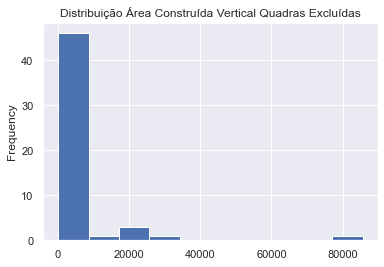

In [57]:
deixaram_existir['area_construida_vertical_2013'].plot.hist(title='Distribuição Área Construída Vertical Quadras Excluídas')



São apenas 119 quadras, menos de 1% das quadras que existem em 2023.

Vemos que, com exceção de alguns registros com área construída alta (160 mil metros quadrados), a maioria deles tem área construída pequena.

De todo modo, como eles não possuem área construída para 2023, eles não comporão a base final. Caso contrário, se imputássemos 0 para 2022, corremos o risco de confundir o modelo em relação à área construída negativa elevada. Não temos segurança para afirmar que toda a área construída vertical da quadra foi demolida.

E, de todo modo, nosso foco está no aumento de área construída no período, não nas demolições eventuais que foram realizadas nos últimos anos para viabilizar novos empreendimentos ou mesmo para especulação imobiliária. Este último fenômeno, ainda que importante e potencialmente relacionado ao PDE, não é o objeto de estudo deste trabalho, e ficará para um estudo subsequente.


In [58]:
len(df)

10690

In [59]:
df = df[df['area_construida_vertical_2023'].notnull()].reset_index(drop=True).copy()

In [60]:
len(df)

10638

In [61]:
14431+119

14550



Vamos comaprar as áreas construídas dos dois períodos.


<AxesSubplot:>

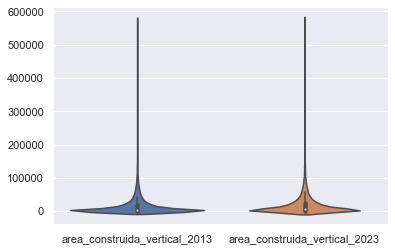

In [62]:
sns.violinplot(data = df[['area_construida_vertical_2013', 'area_construida_vertical_2023']],
               title='Comparação Área Const. Vert. 2013 - 2023')



Observando agora o perfil de maior concentração dos dados


In [63]:


limite  = 0.06*1e6
temp_df = df[(df['area_construida_vertical_2013']<limite)&(df['area_construida_vertical_2023']<limite)]



<AxesSubplot:>

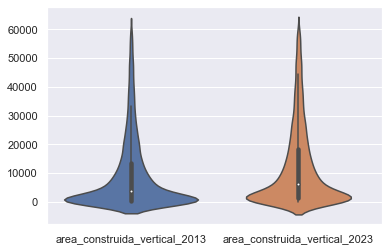

In [64]:
sns.violinplot(data = temp_df[['area_construida_vertical_2013', 'area_construida_vertical_2023']],
               title='Comparação Área Const. Vert. 2013 - 2023')



Os valores médios e medianos de 2023 sao superiores


In [65]:
df['area_construida_vertical_2023'].mean()

19086.958638841887

In [66]:
df['area_construida_vertical_2013'].mean()

14910.62652754277

In [67]:
df['area_construida_vertical_2023'].median()

7806.5

In [68]:
df['area_construida_vertical_2013'].median()

4669.5



Como podemos ver, 2023 parece ter uma concentração de massa dos dados para valores mais superiores do que 2013.

Agora, por fim, podemos calcular nossa variável de interesse: o Delta de área construída no período.


In [69]:
df['delta_pde'] = df['area_construida_vertical_2023'] - df['area_construida_vertical_2013']

In [70]:
df['delta_pde'].mean()

4176.332111299116

In [71]:
df['delta_pde'].max()

242407.0

In [72]:
df['delta_pde'].min()

-51984.0

In [73]:
df['delta_pde'].median()

0.0

<AxesSubplot:title={'center':'Distribuição Delta Área Constru. Vert. 2013-2023'}, ylabel='Frequency'>

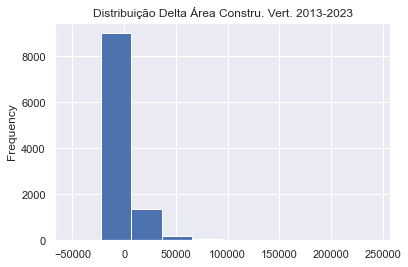

In [74]:
df['delta_pde'].plot.hist(title='Distribuição Delta Área Constru. Vert. 2013-2023')

<AxesSubplot:>

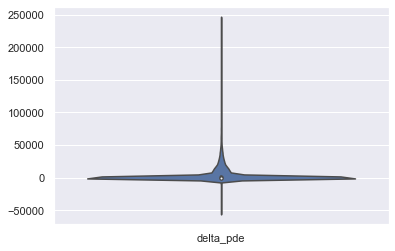

In [75]:
sns.violinplot(data = df[['delta_pde']],
               title='Violin Plot - Delta área construída vertical PDE')




Como pudemos verificar acima, há casos de decréscimo de área construída, em que o delta é negativo.

Esses casos, como já mencionado, não são objeto deste estudo. Sem entrar na hipótese de erros no banco de dados (trata-se do banco de dados do IPTU, e há um grande enforcement para que os dados sejam consistentes), este decréscimo pode estar relacionado a demolições. Sendo isso, há duas possibilidades: podem ser empreendimentos iniciados, cujos lotes já foram unificados e as edificações já demolidas, mas que ainda não receberam habite-se (portanto são atualizados na base do IPTU como terrenos vazios). Ou então trata-se de especulação imobiliária, que é um fenômeno importante, mas que não é objeto de nosso estudo.

Assim, concluímos por excluir esses dados da base.


In [76]:
(df['delta_pde']<0).sum()

393

In [77]:
(df['delta_pde']<0).sum()/len(df)

0.03694303440496334

In [78]:
df = df[df['delta_pde']>=0].reset_index(drop=True).copy()

<AxesSubplot:>

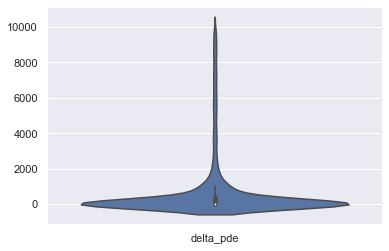

In [79]:
temp_df = df[(df['delta_pde']<1e4)]
sns.violinplot(data = temp_df[['delta_pde']],
               title='Violin Plot - Delta área construída vertical PDE')

<AxesSubplot:ylabel='Frequency'>

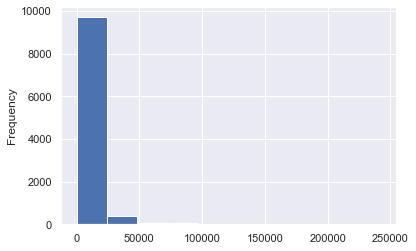

In [80]:
df['delta_pde'].plot.hist()



Há alguns outliers positivos.

Vamos inspecioná-los mais de perto.




Acima de 200000 metros quadrados parecem haver mais registros.


In [83]:
df[(df['delta_pde']>200000)&(df['delta_pde']<300000)]

,quadra,area_construida_vertical_2013,area_construida_vertical_2023,delta_pde
6022,098030,24781.0,240336.0,215555.0
7159,162001,151690.0,353732.0,202042.0
8336,051306,0.0,200625.0,200625.0
9014,087315,0.0,223286.0,223286.0
9987,185054,0.0,242407.0,242407.0
10039,197006,0.0,241205.0,241205.0


In [84]:
steps = list(range(400000, 0, -50000))
dist_registros = []
for i, step in enumerate(steps):
    if i == 0:
        continue
    qtd_registros = len(df[(df['delta_pde']>step)&(df['delta_pde']<steps[i-1])])
    dist_registros.append(qtd_registros)

In [85]:
dist_registros

[0, 0, 0, 6, 9, 21, 111]

<AxesSubplot:>

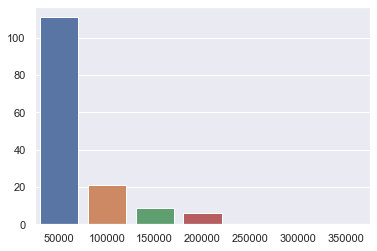

In [86]:
sns.barplot(x = steps[1:], y= dist_registros)



Como podemos ver, parece haver um padrão de redução exponencial da quantidade de registros que se encerra acima de 25000 metros quadrados. Acima disso, os registors parecem ser outliers extremos.

Mas se trata de erros? Vamos buscar essas quadras nas ortofotos disponibilizadas no GeoSampa, começando da quadra com o maior crescimento.


In [87]:
def save_file(df, fname):
    
    fname = solve_path(fname, parent=GENERATED_DATA_FOLDER)
    df.to_csv(fname, sep=';', encoding='utf-8', index=False)

In [88]:
save_file(df, 'delta_area_construida.csv')

In [89]:
df.head()

,quadra,area_construida_vertical_2013,area_construida_vertical_2023,delta_pde
0,001003,6832.0,6832.0,0.0
1,001004,3796.0,3796.0,0.0
2,001005,3594.0,3594.0,0.0
3,001006,2517.0,2517.0,0.0
4,001007,4827.0,8350.0,3523.0
